### notebook to generate a progression of diabetics, non-diabetics and remission patients after a weight reduction intervention

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp as sivp
from scipy.interpolate import interp1d
import string
import matplotlib.transforms as mtransforms
from my_model import *
from my_parameters import *
from my_help_functions import *


# set random seed
np.random.seed(0)

### Define hyperparameters

In [19]:
# hyperparameters 
tspan_ss=[0,2000] # timespan for evaluating the steady state of intitial parametersets in days, 
tspan_1 = [0,300] # timespan for evaluating the first phase where everyone shows steady state behaviour
tspan_2 = [305,2400] # timespan where DEi is increased for some individuals
tspan_3 = [2405,3600]
tstep = 5 # in days
t_eval_ss = list(range(tspan_ss[0],tspan_ss[1] +1, tstep))
t_eval_1 = list(range(tspan_1[0],tspan_1[1] +1, tstep))
t_eval_2 = list(range(tspan_2[0],tspan_2[1] +1, tstep))
t_eval_3 = list(range(tspan_3[0],tspan_3[1] +1, tstep))
spread = 0.2 # spread in uniform distribution for randomly sampling parameters
N_simulations = 100000 # number of simulations (persons)
DEi_range = [1.5, 1.8] # increase in DEi in multiplication factor
DEi_initial = 2500

# initial sampled parameters, does not matter what order they are in
sampled_param_names = [ "ffa_ramax", "cf", "ksi_infl",   # parameter names that are sampled
                  "ksi_ffa", "sgkd", "sgku",  'hgp_bas',
                  'k_infl', 'alpha_a', 'amax', 'alpha_p', 
                  'pmax', 'alpha_isr', 'alpha_m', 'mmax',
                  "eg0"]


# physiological baseline ranges, for checking if sampled parameter simulations are within physiological range
G_range = [70, 100] # [mg/dL]
I_range = [8, 12] # [microU/mL]
FFA_range = [300, 500] # [micromol/L]
Si_range = [0.7, 0.9] # [ml/microU/day]
beta_range = [800, 1200] # [mg]
sigma_range = [400, 600] # [microU/mg/day]
physiological_ranges = [G_range, I_range, FFA_range, Si_range, beta_range, sigma_range]


### Generate initial state of patients

In [ ]:
generated_patients= generate_initial_patients(N_simulations, sampled_param_names, spread, tspan_ss, physiological_ranges)

Generated 0 patients
Generated 100 patients
Generated 200 patients
Generated 300 patients
Generated 400 patients
Generated 500 patients
Generated 600 patients
Generated 700 patients
Generated 800 patients
Generated 900 patients
Generated 1000 patients
Generated 1100 patients
Generated 1200 patients
Generated 1300 patients
Generated 1400 patients
Generated 1500 patients
Generated 1600 patients
Generated 1700 patients
Generated 1800 patients
Generated 1900 patients
Generated 2000 patients
Generated 2100 patients
Generated 2200 patients
Generated 2300 patients
Generated 2400 patients
Generated 2500 patients
Generated 2600 patients
Generated 2700 patients
Generated 2800 patients
Generated 2900 patients
Generated 3000 patients
Generated 3100 patients
Generated 3200 patients
Generated 3300 patients
Generated 3400 patients
Generated 3500 patients
Generated 3600 patients
Generated 3700 patients
Generated 3800 patients
Generated 3900 patients
Generated 4000 patients
Generated 4100 patients
Gene

### Generate the progressions and visualise them

In [4]:
states, time = generate_progressions(generated_patients, DEi_range, DEi_initial, tspan_1, tspan_2, tspan_3, tstep)

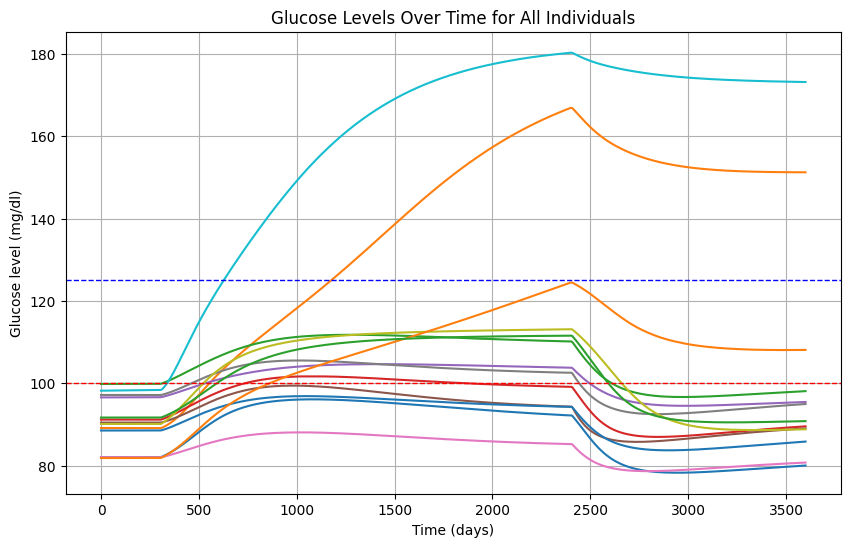

In [17]:
plt.figure(figsize=(10, 6))

for i, person_states in enumerate(states):
    plt.plot(time, person_states[0])  # person_states[0] is glucose

# Add horizontal dotted lines
plt.axhline(100, color='red', linestyle='--', linewidth=1, label='G = 100')
plt.axhline(125, color='blue', linestyle='--', linewidth=1, label='G = 125')

plt.xlabel('Time (days)')
plt.ylabel('Glucose level (mg/dl)')
plt.title('Glucose Levels Over Time for All Individuals')
plt.grid()
plt.show()
